# PROJECT : STOCK PRICE PREDICTION##

TEAM MEMBERS :  BHASKAR SHUKLA 2. SREEJITH SUBHASH 3. ASHUTOSH JOSHI

In [3]:
import pandas as pd # lib for reading the files
import numpy as np  
from sklearn.svm import SVR  # used to build predictive model
from sklearn.linear_model import LinearRegression # for linear regression model
import matplotlib.pyplot as plt  # for ploting the graph from data points
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
sns.set()

In [4]:
# Loading the date of TCS from 1-3-2020 to 30-3-2020     (we get from 2-27 march)
df = pd.read_csv('TCS.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,2035.000000,2053.949951,1985.699951,2001.300049,1986.783813,2667076
1,2020-03-03,2020.000000,2060.000000,2012.000000,2036.199951,2021.430542,2757585
2,2020-03-04,2056.000000,2094.449951,2025.000000,2083.199951,2068.089600,3237002
3,2020-03-05,2085.699951,2147.750000,2084.050049,2125.050049,2109.636230,3937056
4,2020-03-06,2098.000000,2123.649902,2071.600098,2116.449951,2101.098389,2595027
5,2020-03-09,2075.000000,2079.899902,1935.000000,1972.349976,1958.043701,4940975
6,2020-03-11,1933.000000,1987.300049,1920.000000,1953.699951,1939.528931,6796449
7,2020-03-12,1904.000000,1908.400024,1758.349976,1769.849976,1757.012573,8728786
8,2020-03-13,1687.900024,1820.000000,1506.050049,1806.300049,1793.198242,8029720
9,2020-03-16,1755.000000,1842.250000,1675.849976,1696.400024,1684.095337,7844271


In [5]:
# date and prices are list these are X and Y dataset , these are the dataset that contains the feature we want
dates = []
prices = []

In [6]:
# file_name.shape <---- Will return the number of rows and columns
df.shape

(19, 7)

In [7]:
df.tail(1) # we will test on that data (last row)

,Date,Open,High,Low,Close,Adj Close,Volume
18,2020-03-27,1820.0,1850.0,1750.400024,1824.5,1824.5,4331250


In [8]:
#Get all of the data except for the last row
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,2035.000000,2053.949951,1985.699951,2001.300049,1986.783813,2667076
1,2020-03-03,2020.000000,2060.000000,2012.000000,2036.199951,2021.430542,2757585
2,2020-03-04,2056.000000,2094.449951,2025.000000,2083.199951,2068.089600,3237002
3,2020-03-05,2085.699951,2147.750000,2084.050049,2125.050049,2109.636230,3937056
4,2020-03-06,2098.000000,2123.649902,2071.600098,2116.449951,2101.098389,2595027
5,2020-03-09,2075.000000,2079.899902,1935.000000,1972.349976,1958.043701,4940975
6,2020-03-11,1933.000000,1987.300049,1920.000000,1953.699951,1939.528931,6796449
7,2020-03-12,1904.000000,1908.400024,1758.349976,1769.849976,1757.012573,8728786
8,2020-03-13,1687.900024,1820.000000,1506.050049,1806.300049,1793.198242,8029720
9,2020-03-16,1755.000000,1842.250000,1675.849976,1696.400024,1684.095337,7844271


In [9]:
df.shape # Shape of the data will also change , because we excluded the last row (18,7)

(18, 7)

In [10]:
#Now we want all the row from date column <--- Date
df_dates = df.loc[:, 'Date'] # loc function is used to access rows and columns of group
#Now we want all the row from open Column <--- Open Prices
df_open = df.loc[:, 'Open']

In [11]:
#Now we want to create the independent Data set X
for date in df_dates:
  dates.append( [int(date.split('-')[2])]) # <-- 2020 (on index 0) 3 (on index 1) and 2-26 (on index 2)
  
# we also want to create the dependent Data set y
for open_price in df_open:
  prices.append(float(open_price))

In [12]:
#See what days were recorded
print(dates)

[[2], [3], [4], [5], [6], [9], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26]]


### Creating the model, training and ploting the graphs


In [13]:
def predict_prices(dates, prices, x): # here 'x' is the day , So, basically we are predicting for a day (a perticular day)
  
  #we have created three support vector regression models
  svr_lin = SVR(kernel='linear', C= 1e3)  # support vector regression with Linear kernel
  svr_poly= SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) # if we don't give any parameter then 'rbf' default
  
  #here all these parameter we have given are hyper permater , we can change it and we will see the difference how well our model predict price values
  # Kernel is used to convert into seperable form
  # C is used to give smooth boundries and classify trainnig points correctly (soft margin or hard margin)
  # Now we have to train our models  
   
  svr_lin.fit(dates,prices)
  svr_poly.fit(dates,prices)
  svr_rbf.fit(dates,prices) #RBF stands for radiacal basis functions
  #Now we also want to create the linear regression model

  #Create the Linear Regression model
  lin_reg = LinearRegression()
  #Train the Linear Regression model
  lin_reg.fit(dates,prices)

  #Now here we have successfully create and train our model now we have to plot on the graph so see best fit among 4
  svr_rbf_predict = svr_rbf.predict(dates)
  svr_poly_predict = svr_poly.predict(dates)
  svr_lin_predict = svr_lin.predict(dates)
  lin_reg_predict = lin_reg.predict(dates)
    
  #Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_rbf_predict, color='red', label='SVR RBF') 
  plt.plot(dates,svr_poly_predict , color='blue', label='SVR Poly')
  plt.plot(dates, svr_lin_predict , color='green', label='SVR Linear')
  plt.plot(dates, svr_lin_predict , color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()


  
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

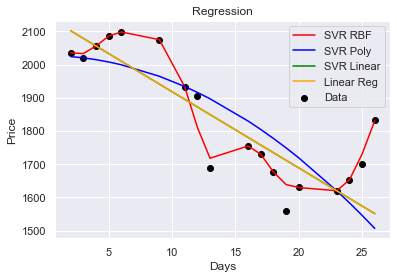

(1951.9441213032565, 1505.4157894735517, 1423.6394876713227, 1560.0006960453686)


In [14]:
#Predict the price of TCS on day 28
predicted_price = predict_prices(dates, prices, [[28]])
print(predicted_price)


Date	Open	High	Low	Close	Adj Close	Volume
18	2020-03-27	1820.0	1850.0	1750.400024	1824.5	1824.5	4331250


## Kernel

kernel takes low dimension feature space(LD) and convert it to hight dimension feature space(HD)
here LD is in the form of non-seperable form means we can't seprate it with a line 
input -> LD ->> Kernel >>> HD
But after it becomes HD then it will become sperable form , means we can seprate it with a line
###### kernel is a very powerful , because  it converts 1D to 2D , or  2D to 3D

In [22]:
true_value = df.tail(1).loc[:, 'Open'].values
pred_price = predicted_price[3]

In [23]:
true_value

array([1831.599976])